In [1]:
import pandas as pd
ad = pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad = (ad - ad.mean())/ad.std()
ad.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [6]:
# Putting feature variable to X
X = ad[['TV','Radio','Newspaper']]
# Putting response variable to y
y = ad['Sales']

In [7]:
X['intercept'] = 1
X = X.reindex_axis(['intercept','TV','Radio','Newspaper'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [8]:
X.head()

,TV,Radio,Newspaper,intercept
0,0.967425,0.979066,1.774493,1
1,-1.194379,1.080097,0.667903,1
2,-1.512360,1.524637,1.779084,1
3,0.051919,1.214806,1.283185,1
4,0.393196,-0.839507,1.278593,1


In [9]:
import numpy as np
X = np.array(X)
y = np.array(y)

# Gradient Descent
1.  What is the cost of the 0th iteration?
    Ans : 0.48
2. What is the cost of the 999th iteration? 
    Ans : 0.05
3. After plotting the graph between the cost and the number of iterations, at what point does the cost get flattened?
    Ans : > 200
4. Is there any difference between the coefficients obtained from the gradient descent from scratch and the coefficients obtained by running linear regression through sklearn?
    Ans : There is a minor difference in some of the coefficients which are caused due to change in the algorithm.
    
    
5. Write about the gradient descent algorithm for linear regression in your own words.

Ans : Gradient descent is: 
1. first-order iterative optimization algorithm 
2. to find a local minimum of a differentiable function. 
3. We take repeated steps of some optimum size. The step size that is too small would slow convergence, and a too large would lead to divergence
4. We step in the opposite direction of the gradient of the function at the current point, because this is the direction of steepest descent.
5. If we step in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent. 

In [10]:
# Theta needed to be changed with the number of response varaible used.
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

In [11]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [12]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [13]:
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[0.00896701873735819, 0.0034788294152263083, 0...",0.488054
1,"[0.017842032587586296, 0.006912616718703789, 0...",0.478812
2,"[0.026626000134855467, 0.010301976346834418, 0...",0.469770
3,"[0.035319869786872966, 0.013647514202632948, 0...",0.460923
4,"[0.04392457988533592, 0.01694982777459, 0.0075...",0.452267
...,...,...
995,"[0.8846048225653723, 0.30041426196436055, 0.00...",0.048461
996,"[0.8846052708861447, 0.3004157861185132, 0.001...",0.048461
997,"[0.8846057148442773, 0.3004173006721337, 0.001...",0.048461
998,"[0.8846061544823363, 0.30041880568513496, 0.00...",0.048461


In [16]:

print(gradient_descent_multi(X, y, theta, alpha, iterations).values[999])

[array([8.84606590e-01, 3.00420301e-01, 1.63040417e-03, 1.39888101e-17])
 0.048460871442445284]


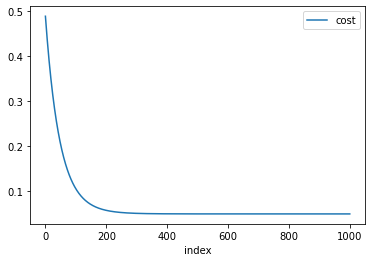

In [20]:

gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

In [18]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

#You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lr.intercept_)
print(lr.coef_)

7.273978948879036e-18
[0.88465106 0.30065466 0.00138348 0.        ]
